<b> Distribuição de Poisson</b>

A distribuição de Poisson, escrita:


$\displaystyle P(k,\lambda)=\frac{\lambda^k}{k!}e^{-\lambda}$


Pegando no exemplo da aula, vamos escrever alguns exemplos.

- Primeiro exemplo $\lambda$=0.7 ($\lambda=np=100\times 0.007$)
- Segundo exemplo $\lambda$=1.4 
- Terceiro exemplo $\lambda$=2.8 
- Quarto exemplo $\lambda$=5.6  
- Quinto exemplo $\lambda$=11.2


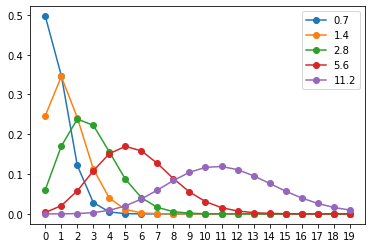

In [2]:
%matplotlib inline
import os
import numpy as np
import math
from scipy.stats import poisson  #módulo que possui a distribuição
import matplotlib.pyplot as plt 
l=np.array([0.7,1.4,2.8,5.6,11.2])   #tendo vários valores de média(𝜆=np), sendo n nr tentativas, p probabilidade
def f(x,l): 
    return poisson.pmf(x,l)
x = np.arange(0,20)
for lval in l:
    plt.plot(x,f(x,lval),'-o', label=lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))


Podemos também calcular a distribuição cumulativa (cdf):

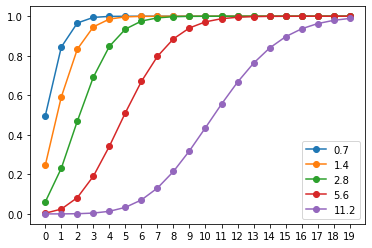

In [9]:
%matplotlib inline
import os
import numpy as np
import math
from scipy.stats import poisson  #módulo que possui a função binomial
import matplotlib.pyplot as plt 
l=np.array([0.7,1.4,2.8,5.6,11.2])
def f(x,l):
    return poisson.cdf(x,l)
x = np.arange(0,20)
for lval in l:
    plt.plot(x,f(x,lval),'-o', label=lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

In [ ]:
Usando o nosso próprio código

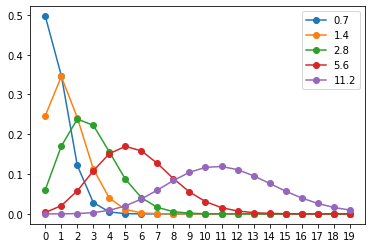

In [12]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy.stats import binom  #módulo que possui a função binomial
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def poisson(x,l):
    poisson = l**x / factorial(x) * math.exp(-l)     # l representa a média 
    return poisson                                   # x representa o "nr sucessos"
def poiss(x,l):
    poiss=[]
    for i in x:
        poiss.append(poisson(i,l))
    return poiss
x = np.arange(0,20)
l=np.array([0.7,1.4,2.8,5.6,11.2])
for lval in l:
    plt.plot(x,poiss(x,lval),'-o', label=lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

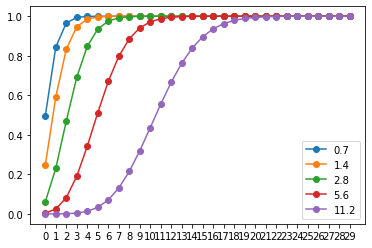

In [28]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy.stats import binom  #módulo que possui a função binomial
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def cumulative(x,l):
    cum = 0.0
    for j in range(0,x+1):
        cum += l**j / factorial(j) * math.exp(-l)
    return cum
def cumul(x,l):
    cumul=[]
    for i in x:
        cumul.append(cumulative(i,l))
    return cumul
x = np.arange(0,30)                         #agora até 30 tentativas
l=np.array([0.7,1.4,2.8,5.6,11.2])
for lval in l:
    plt.plot(x,cumul(x,lval),'-o', label=lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

Vamos agora calcular a média, a moda e a mediana de cada uma:

In [4]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd

from scipy.stats import binom  #módulo que possui a função binomial
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def poisson(x,l):
    poisson = l**x / factorial(x) * math.exp(-l)
    return poisson
def poiss(x,l):
    poiss=[]
    for i in x:
        poiss.append(poisson(i,l))
    return poiss
l=np.array([0.7,1.4,2.8,5.6,11.2])
S=len(l)
mode=[]
median=[]
mean=[]
variance=[]
stdev=[]
for lval in l:
    mean1=lval                      #média corresponde a l,assim como a variância
    mean.append(mean1)
    variance1=lval
    variance.append(lval)
    stdev1=round(math.sqrt(lval),2)   #o desvio padrão representa a raíz quadrada de lambda(l)
    stdev.append(stdev1)
    median1=math.floor(lval+1/3-0.02/lval)     #mediana é l+1/3-(0.02/l)
    if S%2==0:                      #se o número de tentativas, ou seja a soma dos ls, sendo que cada l corresponde a uma média
        mode1=math.ceil(lval-1)     #for par, moda é dada por lambda(l)-1
    else:
        mode1=math.floor(lval)      #se for ímpar, a moda é dada por l 
    median.append(median1)
    mode.append(mode1)
dados = {'lambda': l, 'média': mean,'mediana': median,'moda': mode,"variância": variance,"desvio padrão": stdev}
df = pd.DataFrame(data=dados).set_index('lambda')
df


,média,mediana,moda,variância,desvio padrão
lambda,,,,,
0.7,0.7,1,0,0.7,0.84
1.4,1.4,1,1,1.4,1.18
2.8,2.8,3,2,2.8,1.67
5.6,5.6,5,5,5.6,2.37
11.2,11.2,11,11,11.2,3.35
